## Описание проекта

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
- Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
- Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## План

<a href='#Шаг 1'>Шаг 1. Открытие файла с данными и изучение общей информации</a>

<a href='#Шаг 2'>Шаг 2. Подготовка данных</a>

- Заменим названия столбцов (приведем к нижнему регистру);
- Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
- Обработаем пропуски при необходимости:
- Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишем причины, которые могли привести к пропускам;
- Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

<a href='#Шаг 3'>Шаг 3. Проведение исследовательского анализа данных</a>
- Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
- Соотнесем выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<a href='#Шаг 4'>Шаг 4. Составление портрета пользователя каждого региона</a>
Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<a href='#Шаг 5'>Шаг 5. Проверка гипотез</a>
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Поясним:
- Как мы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий мы применили для проверки гипотез и почему.

<a href='#Шаг 5'>Шаг 6. Общий вывод</a>

<a href='#Шаг 5'>Шаг 7. Дополнение</a>

## Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


<a id='Шаг 1'></a>
### Шаг 1. Открытие файла с данными и изучение общей информации

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt

Чтение файла и изучение общей информации

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14422,Cabela's Big Game Hunter: Pro Hunts,PS3,2014.0,Shooter,0.03,0.00,0.00,0.01,NaN,5.9,T
10129,Kousoku Card Battle: Card Hero,DS,2007.0,Strategy,0.00,0.00,0.11,0.00,NaN,NaN,NaN
5660,Madden NFL 2002,GBA,2001.0,Sports,0.23,0.08,0.00,0.01,NaN,tbd,E
13327,Empire Earth,PC,2001.0,Strategy,0.00,0.04,0.00,0.01,81.0,8.2,T
2351,Buzz! Quiz TV,PS3,2008.0,Misc,0.28,0.47,0.00,0.13,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

В названии колонок много заглавных букв, и некоторые столбцы называются слишком длинно, исправим.

Видим наличие пропусков в полях: 
- название игры, всего два пропуска, просто удалим
- год выпуска, пропуски можно также удалить, так как их доля составляет менее 2%, тем более, что корректно восстановить все данные не удасться
- много пропусков в оценках и рейтингах, но тут ничего не поделаешь, выдумать не получится, а брать среднюю по жанру не вижу логчиным

<a id='Шаг 2'></a>
### Шаг 2. Подготовка данных

#### Заменим названия столбцов (приведем к нижнему регистру);

Приведем названия столбцов к нижнему регистру и переименуем неоторые столбцы для простоты использования

In [5]:
games.columns = games.columns.str.lower()
games.rename(columns={"year_of_release":"year","other_sales":"ot_sales"}, inplace = True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16715 non-null object
year            16446 non-null float64
genre           16713 non-null object
na_sales        16715 non-null float64
eu_sales        16715 non-null float64
jp_sales        16715 non-null float64
ot_sales        16715 non-null float64
critic_score    8137 non-null float64
user_score      10014 non-null object
rating          9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Удаление лишних строк

In [6]:
games.query('name.isna()')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,ot_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Можем удалить эти строки полностью, так как из-за отсутствия информации они никакой ценности не несут

In [7]:
games = games.query('name.notna()')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16713 non-null object
year            16444 non-null float64
genre           16713 non-null object
na_sales        16713 non-null float64
eu_sales        16713 non-null float64
jp_sales        16713 non-null float64
ot_sales        16713 non-null float64
critic_score    8137 non-null float64
user_score      10014 non-null object
rating          9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Обработка пропусков:

In [8]:
games = games.query('year.notna()')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name            16444 non-null object
platform        16444 non-null object
year            16444 non-null float64
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
ot_sales        16444 non-null float64
critic_score    7983 non-null float64
user_score      9839 non-null object
rating          9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name            16444 non-null object
platform        16444 non-null object
year            16444 non-null float64
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
ot_sales        16444 non-null float64
critic_score    7983 non-null float64
user_score      9839 non-null object
rating          9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;

- Год - заполнили пропуски 0, так как данные количественные, удалять их не хочется, так как в них есть полезные данные, например с жанром и количеством продаж

- Оценка пользователей, не стали заполнять пропуски на 0, так как потом может повлиять на дальнейший анализ, например на нахождение корреляции между рейтингом пользователей и рейтингом критиков

- Рейтинг тоже не трогаем, чтобы потом не было путаницы с категорией рейтингов, например при построении зависимости продаж от рейтинга

- Пропуски в оценке критиков не стали заполнять, так как данные не нужны нам для дальнейшего анализа

#### Опишем причины, которые могли привести к пропускам;

Судя по данным, пропуски в рейтингах скорее всего связанны с низкими продажами, похоже на то, что пока у игр просто не достаточно пользователей, чтобы оценить продукт, либо рейтинг по правилам может присваиваться только тем играм, что достигли определенного количества пользователей

#### Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберем это значение и опишите, как его обработать;

TBD - Скорее всего имелось ввиду "To be discussed" или "to be determined", что значит "подлежит уточнению/обсуждению. очевидно, что игра перешла необходимый порог пользователей или продаж и в скором времени ожидает присвоение рейтинга. Заменим TBD на 0, чтобы преобразовать столбец с данным рейтингом в столбец с количественными данными.

#### Преобразование данных в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;

In [10]:
games['year'] = games['year'].astype(int)
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')
#games['user_score'] = np.where(games['user_score'] != 'tbd', games['user_score'], 0)
games['user_score'] = games['user_score'].astype(float)

Приведем год выпуска, оценку критиков к целым числам, так как они могут быть только целыми, а оценку пользователей к дробным.

In [11]:
games['critic_score'] = games['critic_score'].astype(pd.Int64Dtype())
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name            16444 non-null object
platform        16444 non-null object
year            16444 non-null int64
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
ot_sales        16444 non-null float64
critic_score    7983 non-null Int64
user_score      7463 non-null float64
rating          9768 non-null object
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [12]:
games['all_sales'] = games['ot_sales']+games['na_sales']+games['eu_sales']+games['jp_sales']
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name            16444 non-null object
platform        16444 non-null object
year            16444 non-null int64
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
ot_sales        16444 non-null float64
critic_score    7983 non-null Int64
user_score      7463 non-null float64
rating          9768 non-null object
all_sales       16444 non-null float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.6+ MB


### Вывод

С данными были проведены следующие действия: 
- Заменили названия столбцов (приведены к нижнему регистру)
- Были удалены некоторые строки (по пустым значения в полях name и year), всего около 1.6% от всех данных
- Пропуски не чем не заполняли - бесмысленно 
- Столбцы с годом и оценкой критиков привели к типу данных "целые числа" (int)
- Столбец с оценкой пользователей к дробному типу (float), после чего в этом столбце значения TBD заменили на пропуск
- Добавили столбец с продажами во всех регионах

<a id='Шаг 3'></a>
### Шаг 3. Проведение исследовательского анализа данных

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

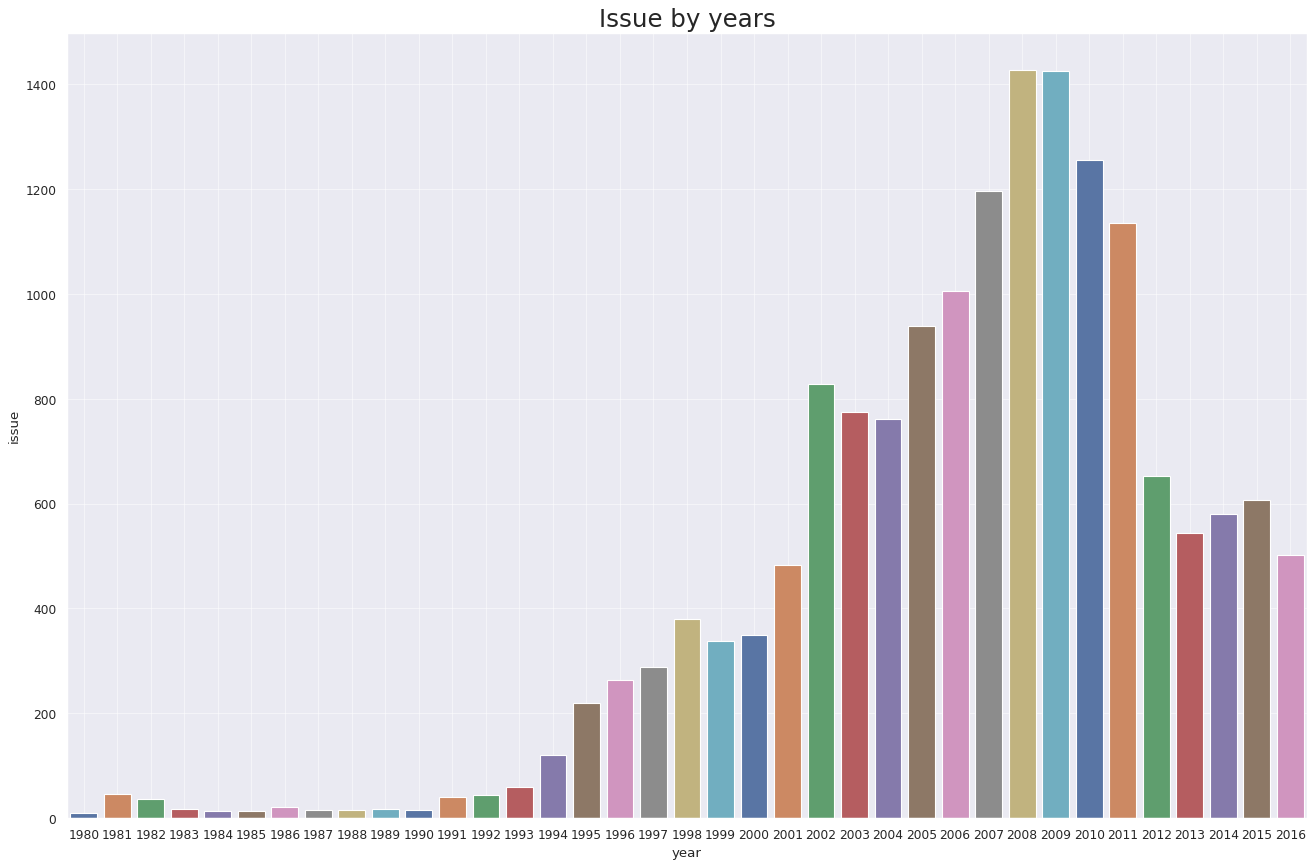

In [68]:
games['issue'] = 1
barplot = games.groupby('year')['issue'].sum().reset_index()

plt.figure(figsize=(20,13), dpi= 80)
sns.barplot(x='year', y='issue', palette="deep", data = barplot)
plt.title('Issue by years', fontsize=22)
plt.grid(alpha = 0.5)
plt.show()

На графике видно, что данные до 2001 года не так интересны, количество выпущенных игр в те времена было минимальным, а значит, не показательным. Отфильтруем эти данные

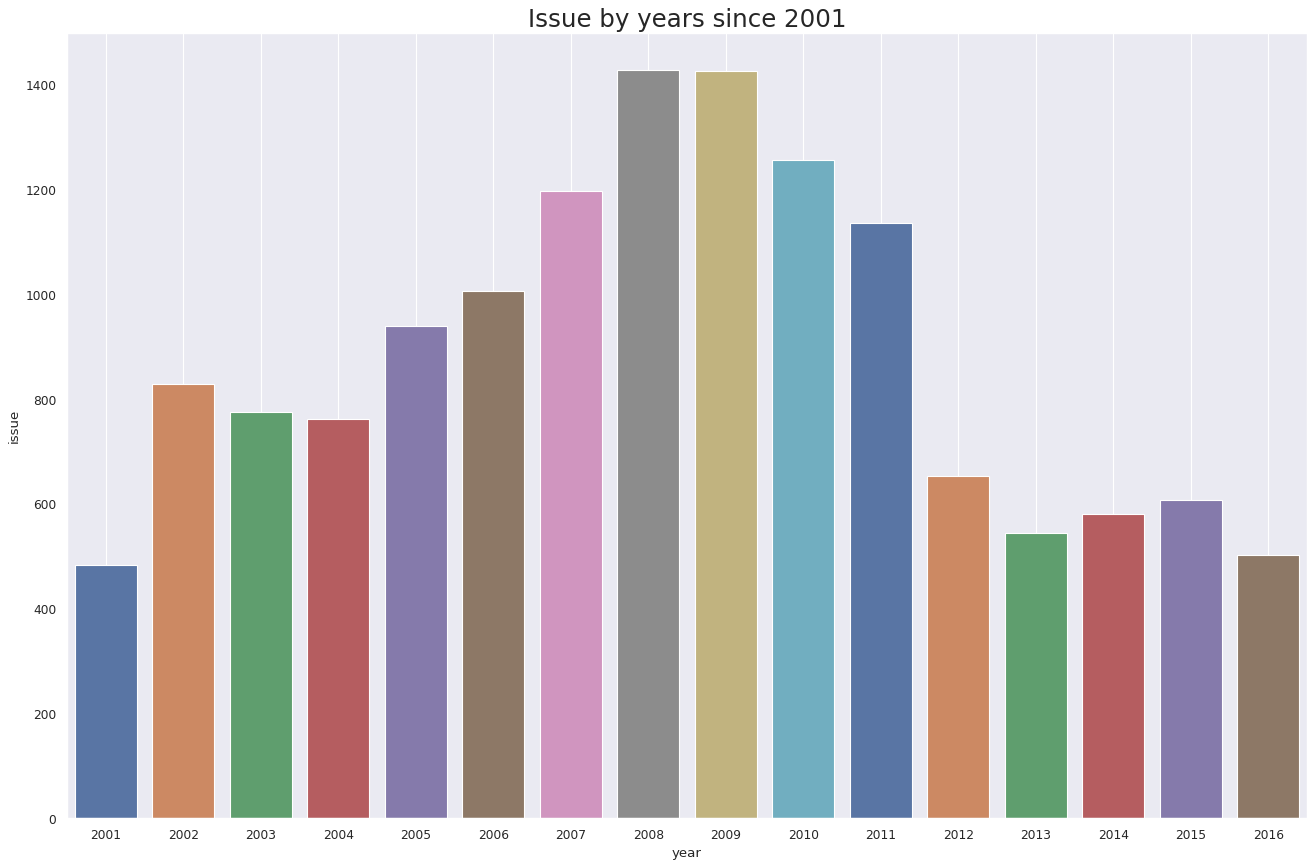

In [69]:
games2001 = games.query('year >=2001')
barplot2001 = games2001.groupby('year')['issue'].sum().reset_index()

plt.figure(figsize=(20,13), dpi= 80)
sns.barplot(x='year', y='issue', palette="deep", data = barplot2001)
plt.title('Issue by years since 2001', fontsize=22)
plt.grid()
plt.show()

#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [17]:
games2001.groupby('platform')['all_sales'].sum().sort_values(ascending = False).head(10).round()

platform
PS2     1194.0
X360     961.0
PS3      931.0
Wii      891.0
DS       803.0
PS4      314.0
GBA      313.0
PSP      290.0
3DS      258.0
XB       251.0
Name: all_sales, dtype: float64

Проведя анализ суммарных продаж платформ, выделим первые 5 ("PS2","X360","PS3","Wii","DS")

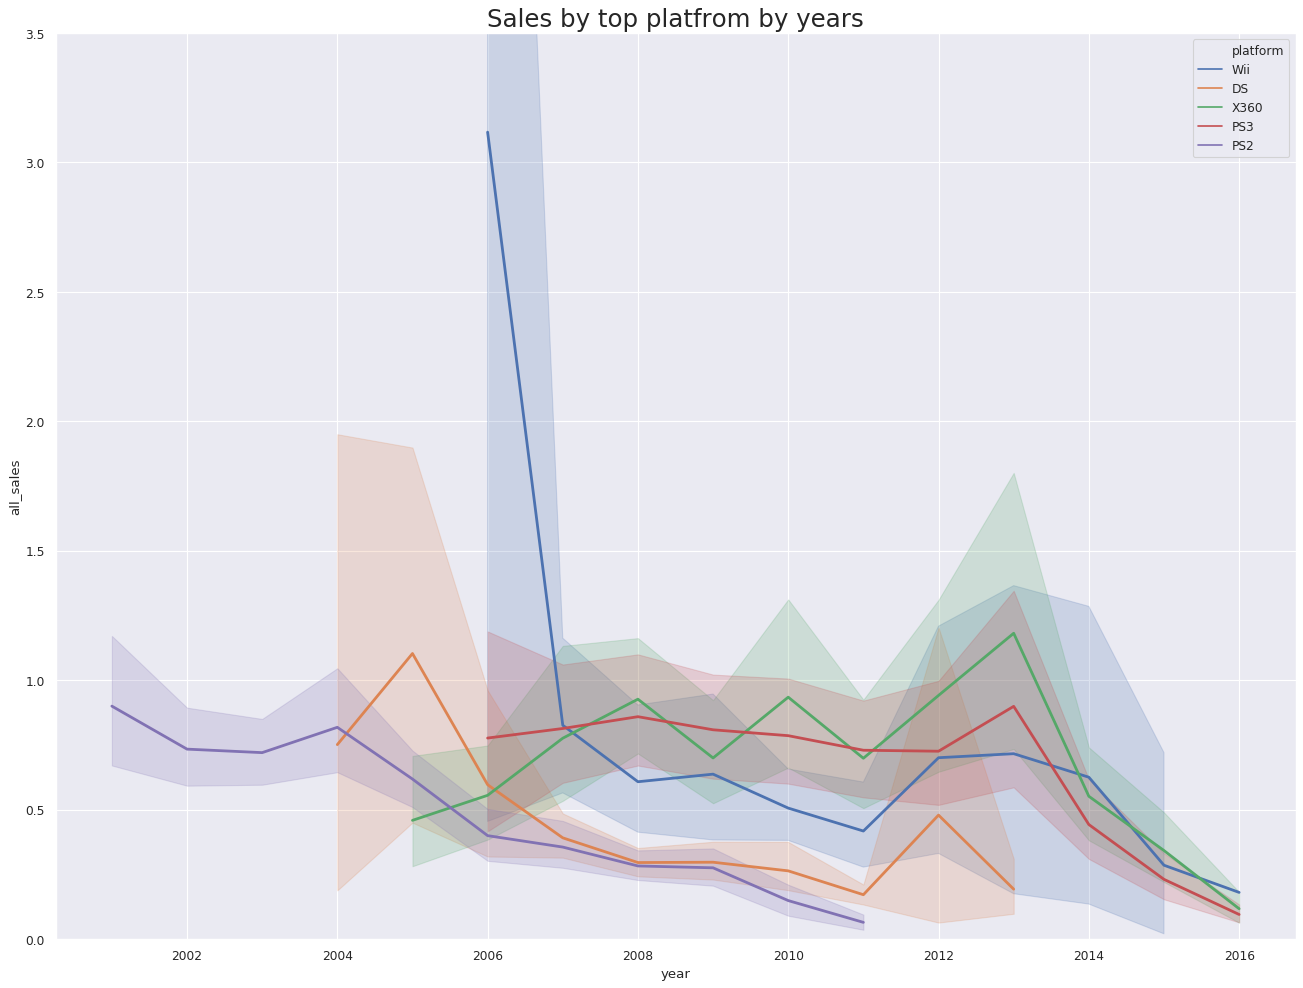

In [71]:
top_platform = games2001.query('platform in ("PS2","X360","PS3","Wii","DS")')

plt.figure(figsize=(20,15), dpi= 80)
sns.set(style="darkgrid")
sns.lineplot(x="year", y="all_sales",hue="platform",data=top_platform,palette="tab10", linewidth=2.5)
plt.title('Sales by top platfrom by years', fontsize=22)
plt.ylim(0, 3.5)
plt.show()

In [20]:
top_platform.groupby('platform')['year'].nunique()

platform
DS      10
PS2     11
PS3     11
Wii     11
X360    12
Name: year, dtype: int64

Исходя из графика и таблицы выше, видим, что в среднем новые платформы живут 11 лет (от 10 до 12 лет). Обычно выстреливают в первые годы и идут на спад к оканчанию жизненного цикла

#### Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Актуальный период - последние 11 лет (отталкиваясь от среднего жизненного цикла платформы). С учетом того, что плнировать нам надо на год вперед, то будем брать данные с 2007 года и не будем брать 2016 год, так как он не полный, и может исказить анализ. Ну и в будущем, при планировании следующего года в конце текущего, текущей скорее всего не закрыт

#### Уберем данные за предыдущие годы.


In [21]:
games2007 = games2001.query('year >= 2012')

#### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.


In [22]:
games2007.groupby('platform')['all_sales'].sum().sort_values(ascending = False).round()

platform
PS4     314.0
PS3     289.0
X360    237.0
3DS     195.0
XOne    159.0
WiiU     82.0
PC       63.0
PSV      49.0
Wii      35.0
DS       13.0
PSP      11.0
Name: all_sales, dtype: float64

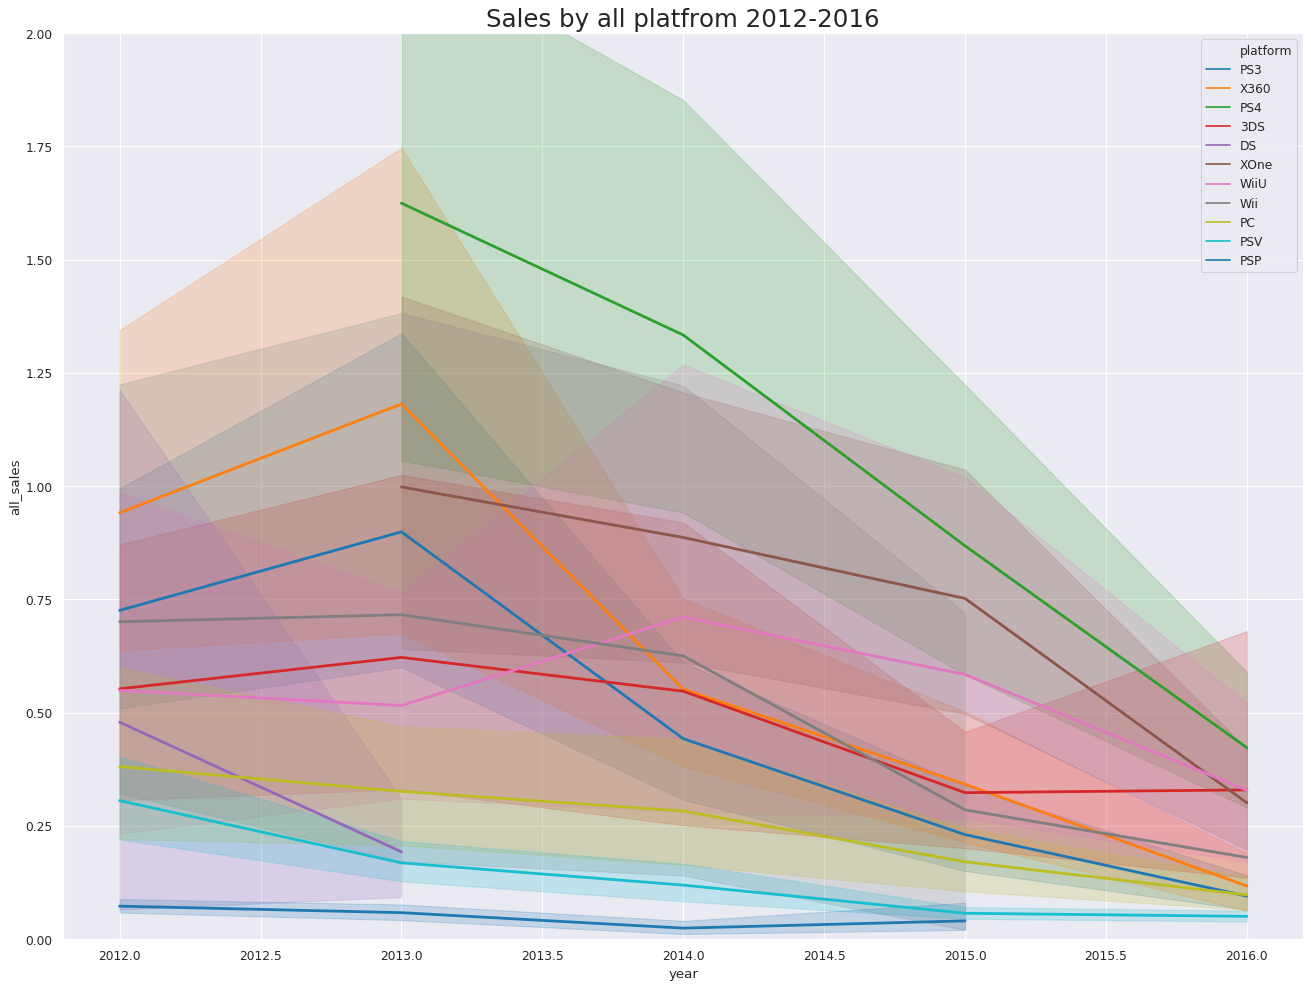

In [23]:
plt.figure(figsize=(20,15), dpi= 80)
sns.set(style="darkgrid")
sns.lineplot(x="year", y="all_sales",hue="platform",data=games2007,palette="tab10", linewidth=2.5)
plt.title('Sales by all platfrom 2012-2016', fontsize=22)
plt.ylim(0,2)
plt.show()

Жизненный цикл 4 лидеров ("X360","PS3","Wii","DS") - подходит к концу, в то время как ("PS4","XOne","3DS","WiiU") только в начале своего жизненного цикла, сделаем ставку на них

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

(0, 2)

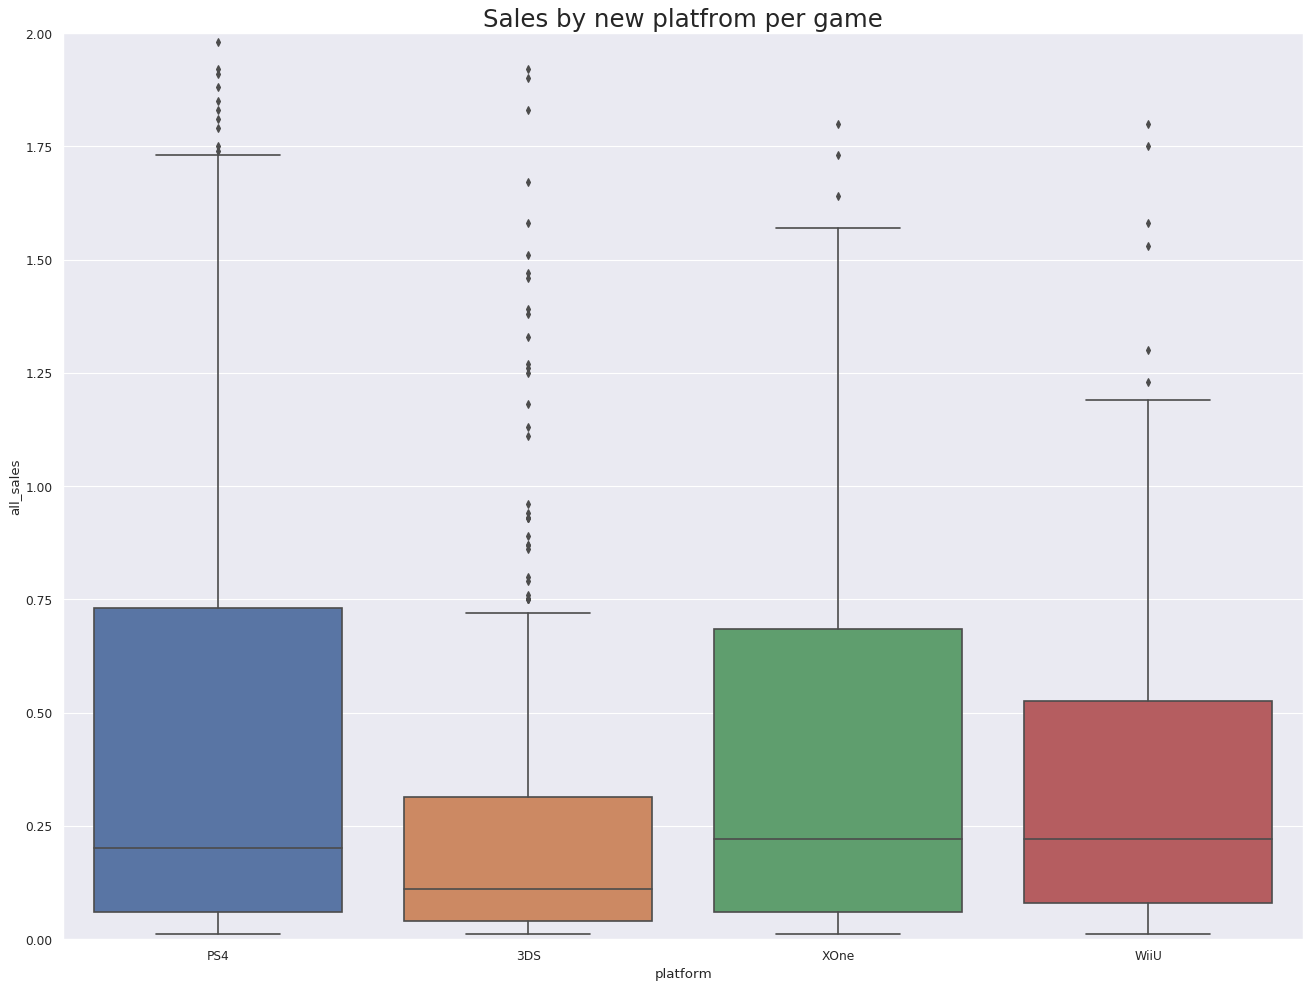

In [25]:
new_platform = games2007.query('platform in ("PS4","XOne","3DS","WiiU")')

sns.set(style="darkgrid")
plt.figure(figsize=(20,15), dpi= 80)
sns.boxplot(x="platform", y="all_sales",data=new_platform)
plt.title('Sales by new platfrom per game', fontsize=22)
plt.ylim(0,2)

Медианные продажа игры на платформах "PS4", "XOne" и WiiU примерно одинакова (около 0,23 млн копий на игру). В то время, как  платформa 3DS значительно отстает (0,1 млн копий на игру). Но, важно учесть, что имеется очень много выбросов у каждой платформы

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.


Text(0.5, 1.0, 'User score and critic score correlation PS3')

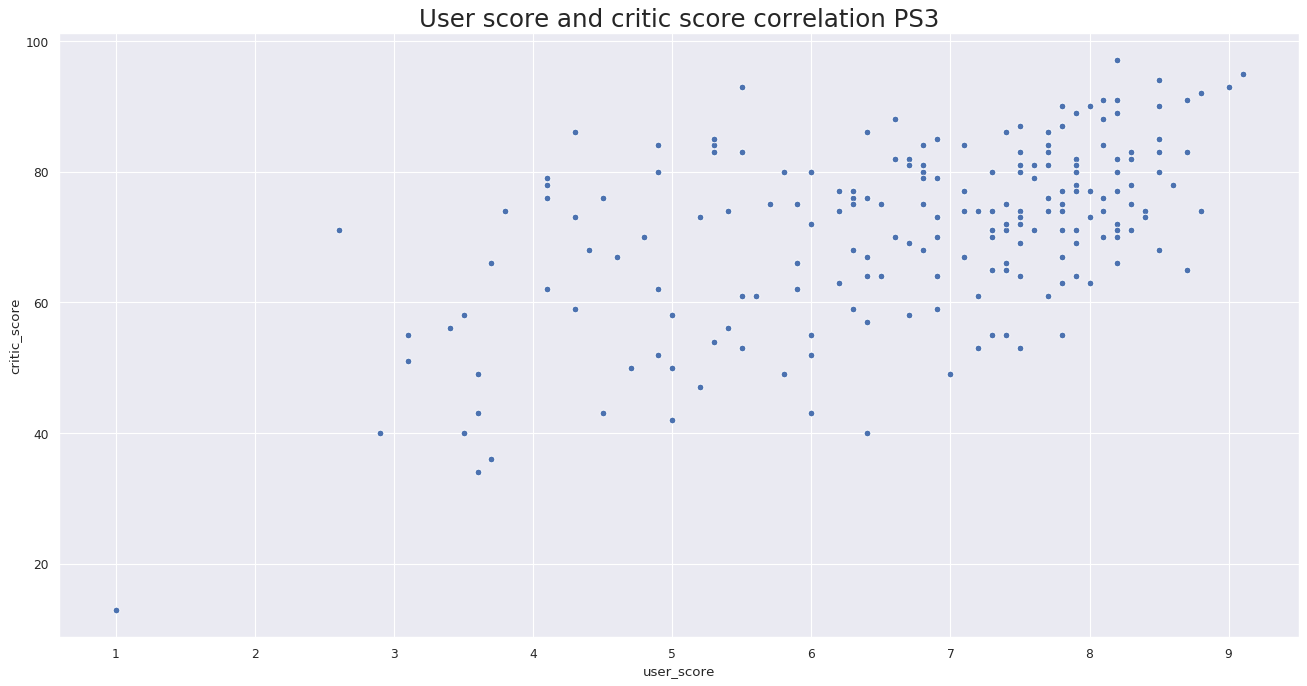

In [27]:
best_platform = games2007.query('platform == "PS3" and user_score != 0')

plt.figure(figsize=(20,10), dpi= 80)
sns.scatterplot(x="user_score", y="critic_score",data=best_platform)
plt.title('User score and critic score correlation PS3', fontsize=22)

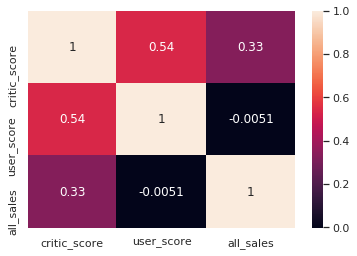

In [29]:
best_platform_corr_chart = best_platform_corr.corr()
sns.heatmap(best_platform_corr_chart, annot=True)

- На диаграме рассеяния мы видим, что оценки критиков и пользователей сильно взаимосвязаны 0,63
- На графике с корреляцией мы видим, что на продажи сильнее влияют оценки критиков 0,43 против 0,12 оценки пользователей

#### Соотнесем выводы с продажами игр на других платформах.


Text(0.5, 1.0, 'User score and critic score correlation all platform')

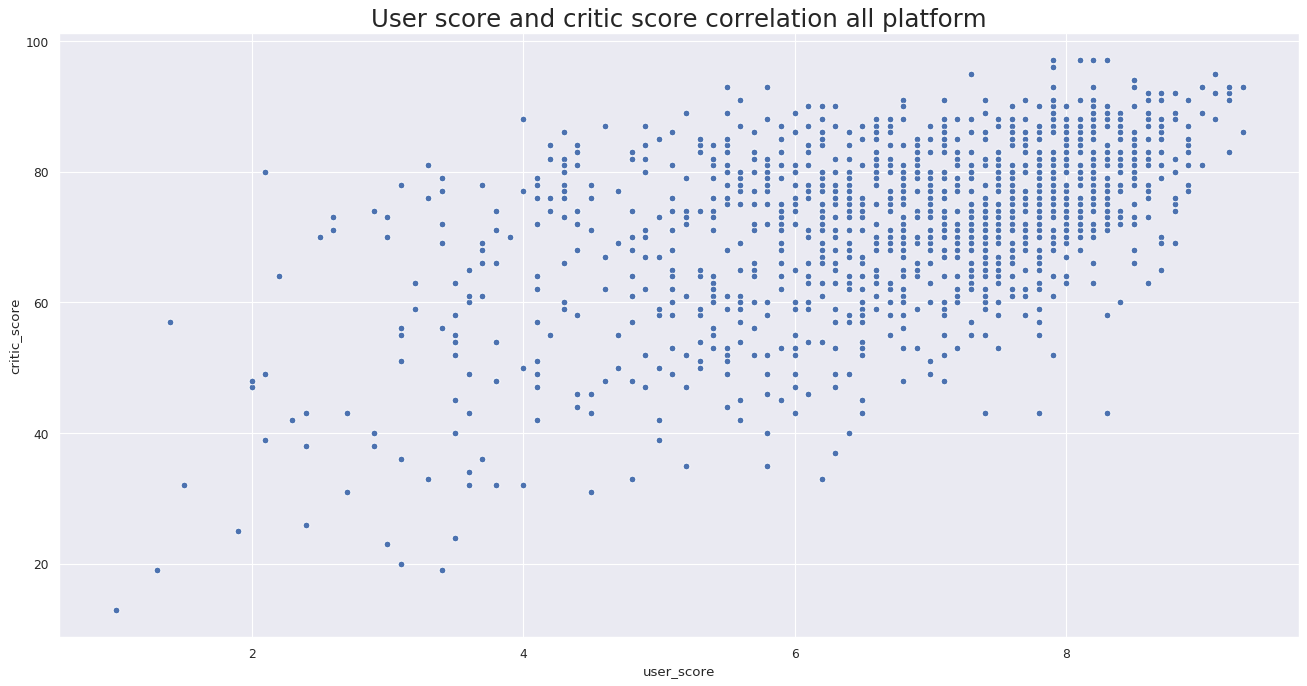

In [31]:
all_platform= games2007.query('user_score != 0')

plt.figure(figsize=(20,10), dpi= 80)
sns.scatterplot(x="user_score", y="critic_score",data=all_platform)
plt.title('User score and critic score correlation all platform', fontsize=22)

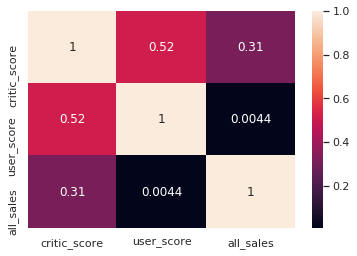

In [33]:
all_platform_corr_chart = all_platform_corr.corr()
sns.heatmap(all_platform_corr_chart, annot=True)

- На диаграме рассеяния по всем платформам мы видим, что оценки критиков и пользователей также взаимосвязаны, но слабее, чем по отдельной PS3 0,59 против 0,63
- На графике с корреляцией мы видим, что на продажи на всех платформах все равно сильнее влияют оценки критиков 0,29 против 0,1 оценки пользователей, но зависимость значительно ниже, чем на PS3

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0.5, 1.0, 'Sales by genres')

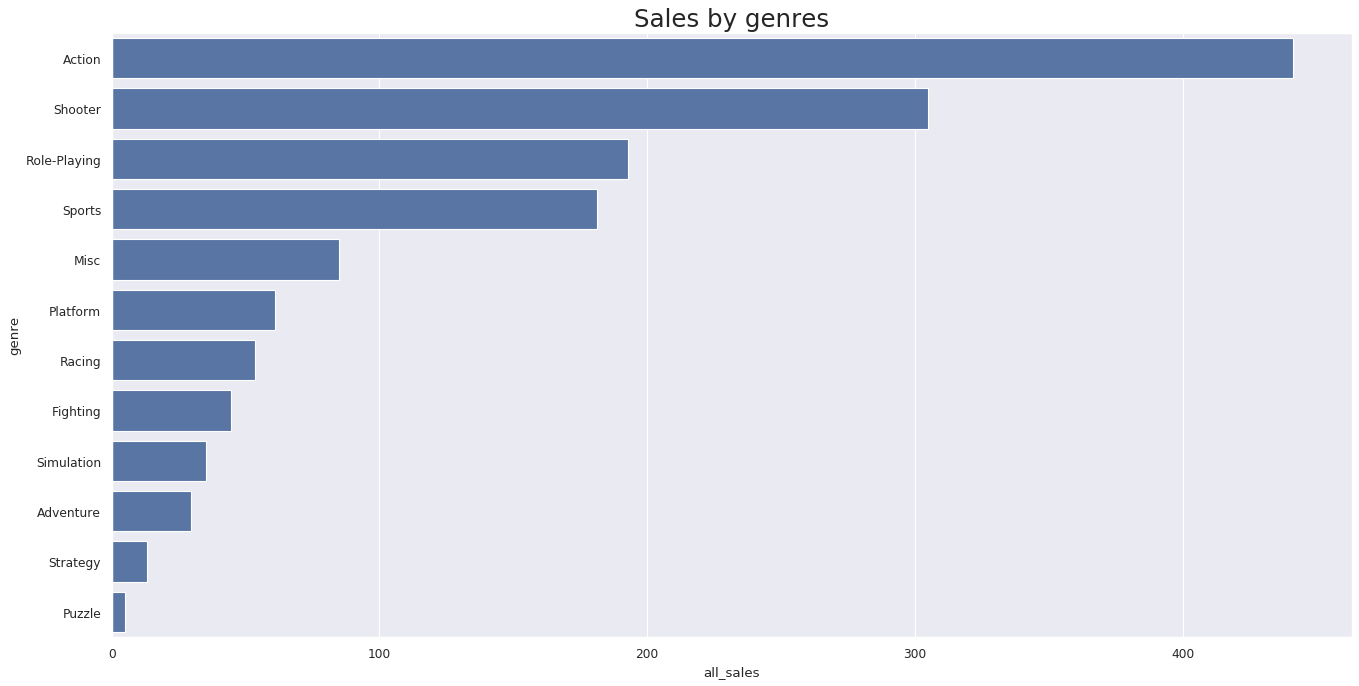

In [35]:
top_genre = games2007.groupby('genre')['all_sales'].sum().sort_values(ascending = False).reset_index()

plt.figure(figsize=(20,10), dpi= 80)
sns.barplot(x="all_sales", y="genre", data=top_genre, color="b")
plt.title('Sales by genres', fontsize=22)

- Самые прибыльные жанры: Актиыне жанры, где не надо думать, направленные на моментальное удовлетворение потребностей в отдыхе:
- Жанры с самыми низкими продажами: игры, где необходимо думать, планировать игру на несколько дней вперед и выстраивать стратегию

- Итого: Люди хотят моментальных удовлетворений потребностей, прийти с работы или собраться с друзьями, выключить мозг и развлечься

In [36]:
games2007.groupby('genre')['all_sales'].agg(['sum','mean','median', 'count']).sort_values(by = 'count', ascending = False).head(5).reset_index()

,genre,sum,mean,median,count
0,Action,441.12,0.427856,0.12,1031
1,Role-Playing,192.80,0.521081,0.14,370
2,Adventure,29.43,0.097450,0.03,302
3,Sports,181.07,0.675634,0.24,268
4,Shooter,304.73,1.296723,0.44,235


In [37]:
games2007.groupby('genre')['all_sales'].agg(['sum','mean','median', 'count']).sort_values(by = 'median', ascending = False).head(5).reset_index()

,genre,sum,mean,median,count
0,Shooter,304.73,1.296723,0.44,235
1,Sports,181.07,0.675634,0.24,268
2,Platform,61.00,0.717647,0.21,85
3,Racing,53.50,0.465217,0.14,115
4,Role-Playing,192.80,0.521081,0.14,370


## Вывод

- Сфера игра начала активно развиваться с 2001 года, когда количество выскаемых игр резко начало увеличиваться
- Самые продаваемые платформы с 2001 года "PS2","X360","PS3","Wii","DS"
- Средний жизненный цикл платформы составляет 11 лет
- Для прогнозирования следующего года используем последние 11 лет, не считая текущего года
- Потенциально прибыльные платформы в ближайшем времени "PS4","XOne","3DS","WiiU"
- Самые перспектиные из них "PS4","XOne" на них приходится самое большое количество копий на игру (медианное значение около 0.3 млн копий
- Есть тесная взаимосвязь между оценкой пользователей и критиков
- На уровень продаж сильнее влияет оценка критиков
- Самые популярные жанры - активные игры (аркады, шутеры и спорт)
- Самые невостребованные жанры - логические игры, головоломки

- Самый популярный жанр - Action (1031 игра)
- Самый востребованный жанр - Shooter (в среднем 0,44 М копий на игру)

<a id='Шаг 4'></a>
### Шаг 4. Составление портрета пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP):

#### Самые популярные платформы (топ-5). Опишем различия в долях продаж.

Выберем топ 5 в регионе Северная Америка и посчитаем долю продаж приходящихся на эти платформы

In [38]:
na_top = games2007.groupby('platform')['na_sales'].sum().sort_values(ascending = False).reset_index()
na_top['na_share'] = na_top['na_sales'] / na_top['na_sales'].sum()
na_top = na_top[['platform','na_share']].head(5).round(2)
na_top

,platform,na_share
0,X360,0.24
1,PS4,0.18
2,PS3,0.17
3,XOne,0.16
4,3DS,0.09


Выберем топ 5 в регионе Европа и посчитаем долю продаж приходящихся на эти платформы

In [39]:
eu_top = games2007.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).reset_index()
eu_top['eu_share'] = eu_top['eu_sales'] / eu_top['eu_sales'].sum()
eu_top = eu_top[['platform','eu_share']].head(5).round(2)
eu_top

,platform,eu_share
0,PS4,0.28
1,PS3,0.21
2,X360,0.15
3,XOne,0.10
4,3DS,0.08


Выберем топ 5 в регионе Япония и посчитаем долю продаж приходящихся на эти платформы

In [40]:
jp_top = games2007.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).reset_index()
jp_top['jp_share'] = jp_top['jp_sales'] / jp_top['jp_sales'].sum()
jp_top = jp_top[['platform','jp_share']].head(5).round(2)
jp_top

,platform,jp_share
0,3DS,0.46
1,PS3,0.18
2,PSV,0.11
3,PS4,0.08
4,WiiU,0.07


Соберем все платформы в одну таблицу для возможности сравнения и отменим свертывание таблицы для возможности представления на одном графике

In [41]:
all_top=na_top.merge(eu_top, how = 'outer').merge(jp_top,how = 'outer')
all_top = all_top.groupby('platform').sum()
all_top = all_top.stack(-1).reset_index()
all_top.set_axis(['platform', 'region', 'sales'], axis='columns', inplace=True)

Построим график 

Text(0.5, 1, 'Top 5 platforms by region')

<Figure size 1600x800 with 0 Axes>

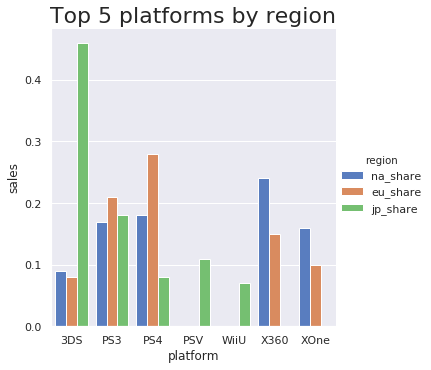

In [42]:
plt.figure(figsize=(20,10), dpi= 80)
sns.catplot(x="platform", y="sales", hue="region", data=all_top, kind="bar", palette="muted")
plt.title('Top 5 platforms by region', fontsize=22)

#### Вывод
Как мы можем видеть на графике в Европе и Америке популярностью больше пользуются мощные домашние приставки подходящие для больших экранов X360, PS3 и PS4, видно что в этих регионах приедпочитают играть в игры дома или у знакомых, в то время как в Японии большую популярность получили портативные приставки Nintendo 3DS, PSV, WiiU для возможности играть всегда и везде, например в общественном трансорте или местах. Похоже, что различия тесно связаны с разницей культур этих стран. 

#### Самые популярные жанры (топ-5). Поясним разницу.

Выберем топ 5 жанров в регионе Северная Америка и посчитаем долю продаж приходящихся на эти жанры

In [43]:
na_top_genre = games2007.groupby('genre')['na_sales'].sum().sort_values(ascending = False).reset_index()
na_top_genre['na_share'] = na_top_genre['na_sales'] / na_top_genre['na_sales'].sum()
na_top_genre = na_top_genre[['genre','na_share']].head(5).round(2)
na_top_genre

,genre,na_share
0,Action,0.30
1,Shooter,0.24
2,Sports,0.14
3,Role-Playing,0.11
4,Misc,0.06


Выберем топ 5 жанров в регионе Европа и посчитаем долю продаж приходящихся на эти жанры

In [44]:
eu_top_genre = games2007.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).reset_index()
eu_top_genre['eu_share'] = eu_top_genre['eu_sales'] / eu_top_genre['eu_sales'].sum()
eu_top_genre = eu_top_genre[['genre','eu_share']].head(5).round(2)
eu_top_genre

,genre,eu_share
0,Action,0.31
1,Shooter,0.22
2,Sports,0.14
3,Role-Playing,0.10
4,Racing,0.05


Выберем топ 5 жанров в регионе Япония и посчитаем долю продаж приходящихся на эти жанры

In [45]:
jp_top_genre = games2007.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).reset_index()
jp_top_genre['jp_share'] = jp_top_genre['jp_sales'] / jp_top_genre['jp_sales'].sum()
jp_top_genre = jp_top_genre[['genre','jp_share']].head(5).round(2)
jp_top_genre

,genre,jp_share
0,Role-Playing,0.34
1,Action,0.27
2,Misc,0.07
3,Simulation,0.05
4,Fighting,0.05


Соберем все платформы в одну таблицу для возможности сравнения и отменим свертывание таблицы для возможности представления на одном графике

In [46]:
all_top_genre=na_top_genre.merge(eu_top_genre, how = 'outer').merge(jp_top_genre,how = 'outer')
all_top_genre = all_top_genre.groupby('genre').sum()
all_top_genre = all_top_genre.stack(-1).reset_index()
all_top_genre.set_axis(['genre', 'region', 'sales'], axis='columns', inplace=True)

Построим график 

Text(0.5, 1, 'Top 5 genres by region')

<Figure size 4000x2000 with 0 Axes>

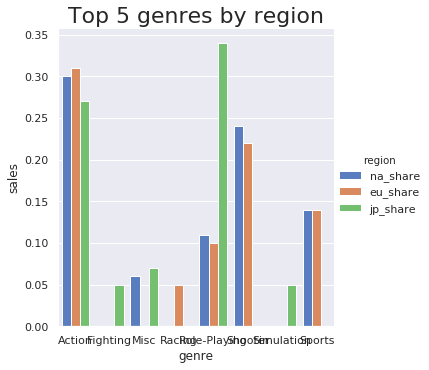

In [47]:
plt.figure(figsize=(20,10), dpi= 200)
sns.catplot(x="genre", y="sales", hue="region", data=all_top_genre, kind="bar", palette="muted")
plt.title('Top 5 genres by region', fontsize=22)

#### Вывод
И снова видим сходство между Америкой и Европой, где более популярны актиные жанры (шутеры, спорт, аркады). В то время как в японии абсолютное лидерство у игр жанра РПГ и вообще не популярны шутеры. Очевидно, что напрямую связано с поплуярностью платформ в своих регионах, правда не понятно, жанры зависят от приставок, или наоборот, приставки выбирают из своих предпочтений. Анализ самых популярных жанров снова показывает на огромную разницу в культуре этих регионов

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Первый делом уберем из выборки все данные, где рейтинг не заполнен

In [48]:
games_notna = games2007.query('rating.notna()')

Выберем топ 4 (так как на 4 категории приходится 100% продаж) возрастные категории в регионе Северная Америка и посчитаем долю продаж приходящихся на эти возрастные категории

In [49]:
na_top_rating = games_notna.groupby('rating')['na_sales'].sum().sort_values(ascending = False).reset_index()
na_top_rating['na_share'] = na_top_rating['na_sales'] / na_top_rating['na_sales'].sum()
na_top_rating = na_top_rating[['rating','na_share']].head(5).round(2)
na_top_rating

,rating,na_share
0,M,0.47
1,E,0.23
2,E10+,0.16
3,T,0.14


Выберем топ 4 (так как на 4 категории приходится 100% продаж) возрастные категории в регионе Европа и посчитаем долю продаж приходящихся на эти возрастные категории

In [50]:
eu_top_rating = games_notna.groupby('rating')['eu_sales'].sum().sort_values(ascending = False).reset_index()
eu_top_rating['eu_share'] = eu_top_rating['eu_sales'] / eu_top_rating['eu_sales'].sum()
eu_top_rating = eu_top_rating[['rating','eu_share']].head(5).round(2)
eu_top_rating

,rating,eu_share
0,M,0.47
1,E,0.27
2,E10+,0.13
3,T,0.13


Выберем топ 4 (так как на 4 категории приходится 100% продаж) возрастные категории в регионе Япония и посчитаем долю продаж приходящихся на эти возрастные категории

In [51]:
jp_top_rating = games_notna.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).reset_index()
jp_top_rating['jp_share'] = jp_top_rating['jp_sales'] / jp_top_rating['jp_sales'].sum()
jp_top_rating = jp_top_rating[['rating','jp_share']].head(5).round(2)
jp_top_rating

,rating,jp_share
0,E,0.34
1,T,0.31
2,M,0.25
3,E10+,0.10


Соберем все платформы в одну таблицу для возможности сравнения и отменим свертывание таблицы для возможности представления на одном графике

In [52]:
all_top_rating=na_top_rating.merge(eu_top_rating, how = 'outer').merge(jp_top_rating,how = 'outer')
all_top_rating = all_top_rating.groupby('rating').sum()
all_top_rating = all_top_rating.stack(-1).reset_index()
all_top_rating.set_axis(['rating', 'region', 'sales'], axis='columns', inplace=True)

Построим график

Text(0.5, 1, 'Top 5 ratings by region')

<Figure size 1600x800 with 0 Axes>

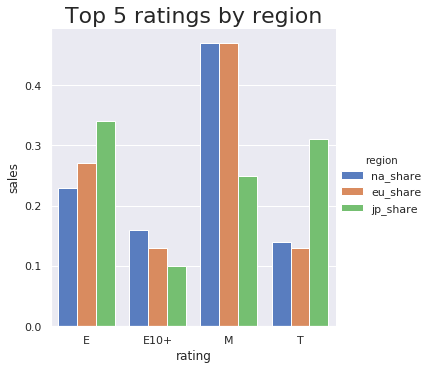

In [53]:
plt.figure(figsize=(20,10), dpi= 80)
sns.catplot(x="rating", y="sales", hue="region", data=all_top_rating, kind="bar", palette="muted")
plt.title('Top 5 ratings by region', fontsize=22)

#### Краткое описание категорий:

- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера

- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови.

- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

#### Вывод
- На графике снова можем видеть сходство между Европой и Америкой, там лидирует категория «M» - игры для взрослых, в то время, как в Японии эта категория занимает лишь 3ее место, а лидер - «E»  игры для всех
- На втором месте в регионах Е и СА - «E»  игры для всех, в то время, как для Японии игры для подростков
- Последнее место во всех регионах занимает категория «E10+» - Для всех от 10 лет и старше, видимо это связано с тем, что аудитория  уэтой категории очень узкая

В целом, можем наблюдать сходство между Европой и Северной Америкой, и как сильно отличается аудитория в Японии

<a id='Шаг 5'></a>
## Шаг 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- **Нулевая гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC не отличаются
- **Алтернативаная гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC различны

Сделаем срез, где выберем данные только по этим платформам, где рейтинг не пустое значение и не 0, на который мы заменили значение TBD 

In [54]:
hypo1 = games2007.query('user_score.notna() and user_score !=0 and (platform == "XOne" or platform == "PC")')

Посмотрим, как отличаются средние оценки пользователей по платформам

In [55]:
hypo1.groupby('platform')['user_score'].agg(['mean','count']).round().reset_index()

,platform,mean,count
0,PC,6.0,206
1,XOne,7.0,182


Сформируем выборки по платформам

In [56]:
xone = hypo1.query('platform == "XOne"')['user_score']
pc = hypo1.query('platform == "PC"')['user_score']

Зададим порог допустимой ошибки в 5% ( если вероятность получения разности в средней оценке пользователей по платформам выше, чем этот коэффициент, то считаем, что данные не противоречат нулевой гипотезе)

In [57]:
alpha = 0.05

Применим метод для гипотезы о равенстве средних двух генеральных совокупностей, так как мы сравниваем средние двух совокупностей по разным платформам

<div class="alert alert-block alert-info">
<b>Обязательно копну поглубже, изучу) </b>
</div>

In [58]:
results = st.ttest_ind(xone, pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


#### Вывод
P.value - очень высокий, это значит получить такую разницу между средними оценками пользователей разных платформ случайно составляет около 55%,  у нас не получилось отвергнуть нулевую гипотезу - средние пользовательские рейтинги платформ Xbox One и PC вероятно не различаются 

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- **Нулевая гипотеза:** средние пользовательские рейтинги жанров Action и Sports не отличаются
- **Алтернативаная гипотеза:** средние пользовательские рейтинги жанров Action и Sports различны

Сделаем срез, где выберем данные только по этим жанрам, где рейтинг не пустое значение и не 0, на который мы заменили значение TBD 

In [59]:
hypo2 = games2007.query('user_score.notna() and user_score !=0 and (genre == "Action" or genre == "Sports")')

Посмотрим, как отличаются средние оценки пользователей по жанрам

In [60]:
hypo2.groupby('genre')['user_score'].agg(['mean','count']).round().reset_index()

,genre,mean,count
0,Action,7.0,523
1,Sports,5.0,195


Сформируем выборки по жанрам

In [61]:
action = hypo2.query('genre == "Action"')['user_score']
sports = hypo2.query('genre == "Sports"')['user_score']

Зададим порог допустимой ошибки в 5% ( если вероятность получения разности в средней оценке пользователей по жанрам выше, чем этот коэффициент, то считаем, что данные не противоречат нулевой гипотезе)

In [62]:
alpha = 0.05

Применим метод для гипотезы о равенстве средних двух генеральных совокупностей, так как мы сравниваем средние двух совокупностей по разным жанрам

In [63]:
results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


#### Вывод
P.value - очень низкий, это значит получить такую разницу между средними оценками пользователей разных жанров случайно практически невозможен, у нас есть основания отбросить нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports различны

## Шаг 6. Общий вывод (расчеты)

Самые продаваемые платформы

In [64]:
games.groupby('platform')['all_sales'].sum().sort_values(ascending= False).head(5)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: all_sales, dtype: float64

Перспективные платформы

In [65]:
new_platform.groupby('platform')['all_sales'].sum().sort_values(ascending= False)

platform
PS4     314.14
3DS     194.61
XOne    159.32
WiiU     82.19
Name: all_sales, dtype: float64

In [66]:
games.groupby('genre')['all_sales'].sum().sort_values(ascending= False).head(5)

genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Name: all_sales, dtype: float64

<a id='Шаг 6'></a>
## Шаг 6. Общий вывод

#### Принцип работы с данными: 
- Берем данные за последние 5 лет (жизненный цикл продукта / 2) 
- Выбираем, какой регион будем прогнозировать
- Далее смотрим на определяющие успешность игры закономерности: 

#### 1. Платформа, на которой вышла игра
- Для Европы и Америки лучшими платформами являются домашние платформы: X360,XOne,PS3,PS4	
- Для Японии больше портативные платформы: 3DS, PSV, PS3, PS4, WiiU	

#### 2. Жанр игры
- Для Европы и Америки лучшими жанрами являются актиные игры: Action,Shooter,Sports,Misc,Role-Playing, скорее всего это связано с тем, что жители этих регионов предпочитают играть дома или у друзей 	

- В то время как в Японии самым популярным жанром является РПГ, а потом уже активные жанры: Role-Playing, Action,Misc,Sports,Platform, скорее всего это связано с преобладающим количеством переносных платформ, в которые удобно играть в любом месте

#### 3. Категория игры
- На графике снова можем видеть сходство между Европой и Америкой, там лидирует категория «M» - игры для взрослых, в то время, как в Японии эта категория занимает лишь 3ее место, а лидер - «E»  игры для всех
- Последнее место во всех регионах занимает категория «E10+» - Для всех от 10 лет и старше




## Шаг 6. Дополнение

#### Топ 5 самых продаваемых платформ за все время (млн.копий)

- PS2     1233.56
- X360     961.24
- PS3      931.34
- Wii      891.18
- DS       802.78

#### Самые перспективные платформы (млн.копий)

- PS4     314.14
- 3DS     194.61
- XOne    159.32
- WiiU     82.19

#### Топ 5 самых продаваемых жанров за все время (млн.копий)

- Action          1716.52
- Sports          1309.67
- Shooter         1041.36
- Role-Playing     931.08
- Platform         825.55

#### Выводы по корреляции

- Видим тенденцию по всем платформам, что на продажи игр сильнее влияют отзывы критиков, в то время как оценки пользователей практически не оказывают никакого влияния на продажи

- Так же обнаружили очень сильную корреляцию между оценками критиков и пользователей

#### Выводы по гипотезам
-  Нет оснований считать, что средние пользовательские рейтинги платформ Xbox One и PC различаются
-  Средние пользовательские рейтинги жанров Action и Sports различны (Action 7.0 / Sports 5.0)